In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import glob
plt.style.use('./paper.mplstyle')

In [2]:
def plot_mc1(case="navajo_mc_pumped", base="navajo_cs_pumped", title="Steam temperature (K)", key = "condenser.Text"):

    fig, ax = plt.subplots()

    with open("{}.out.json".format(base)) as f:
        json_data=f.read()
    data = json.loads(json_data)
    x = np.array(data[key]["Times"])/24/3600
    y = np.array(data[key]["Values"])
    ax.plot(x, y, "-", color="blue", linewidth = 1, label="Base Scenario")
    
    Y=[]
    for file in glob.glob("../mc/{}_*.out.json".format(case)):
        try:
            with open(file) as f:
                json_data=f.read()
                data = json.loads(json_data)
        except:
            continue

        x = np.array(data[key]["Times"])/24/3600
        y = np.array(data[key]["Values"])
        ax.plot(x, y, ".", color="gray", markersize=1, linewidth = 0.5)
        Y.append(y)
    Y = np.array(Y)

    ax.plot(x, np.mean(Y, axis=0), "k-", markersize=0, linewidth = 2, label="mean")
    ax.plot(x, np.mean(Y, axis=0)+np.std(Y, axis=0), "r--", markersize=0, linewidth = 2, label="+std")
    ax.plot(x, np.mean(Y, axis=0)-np.std(Y, axis=0), "r--", markersize=0, linewidth = 2, label="-std")

    ax.legend()
    ax.set_ylabel(title)
    ax.set_xlabel("Time (days)")
    ax.grid()

    plt.savefig('../mc/plot_mc1_{}_{}.pdf'.format(case, key), dpi=600)
    plt.show()
    

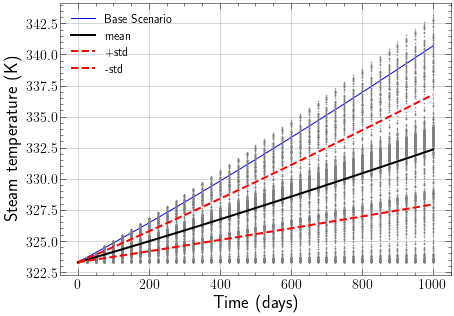

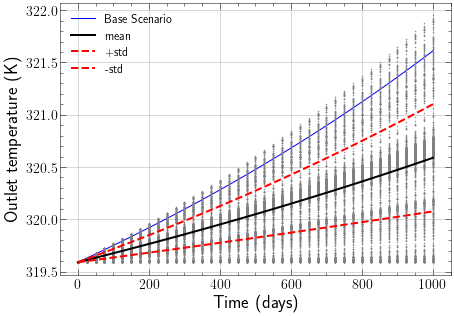

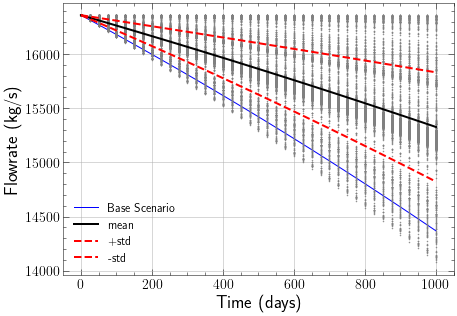

In [3]:
plot_mc1(case="navajo_mc_pumped", title="Steam temperature (K)", key = "condenser.Text")
plot_mc1(case="navajo_mc_pumped", title="Outlet temperature (K)", key = "node_C.T")
plot_mc1(case="navajo_mc_pumped", title="Flowrate (kg/s)", key = "node_C.w")

In [4]:
def plot_mc2(case="navajo_mc_pumped", base="navajo_cs_pumped", zi=30, ti=-1, title="Rf (m$^2$ K/W)", key = "condenser.Rf", ylim=None):
        
    fig, ax = plt.subplots()

    with open("{}.out.json".format(base)) as f:
        json_data=f.read()
        data = json.loads(json_data)

    x=data[key]["Domains"][0]
    y=np.array(data[key]["Values"])[ti,:,zi]
    ax.plot(x, y, "-", color="blue",linewidth = 1, label="Base Scenario")


    Y=[]
    for file in glob.glob("../mc/{}_*.out.json".format(case)):
        try:
            with open(file) as f:
                json_data=f.read()
                data = json.loads(json_data)
        except:
            continue
            
        x=data[key]["Domains"][0]
        y=np.array(data[key]["Values"])[ti,:,zi]
        t=data[key]["Times"][ti]/24/3600
        ax.plot(x, y, ".", color="gray", markersize=1, linewidth = 0.5)
        Y.append(y)
        
    Y = np.array(Y)

    ax.plot(x, np.mean(Y, axis=0), "k-", markersize=0, linewidth = 2, label="mean")
    ax.plot(x, np.mean(Y, axis=0)+np.std(Y, axis=0), "r--", markersize=0, linewidth = 2, label="+std")
    ax.plot(x, np.mean(Y, axis=0)-np.std(Y, axis=0), "r--", markersize=0, linewidth = 2, label="-std")

    ax.set_ylabel(title)
    ax.set_xlabel("x")
    ax.grid()

    if ylim is not None:
        ax.set_ylim(ylim)
    
    plt.savefig('../mc/plot_mc2_{}_{}.pdf'.format(case, key), dpi=600)
    plt.show()

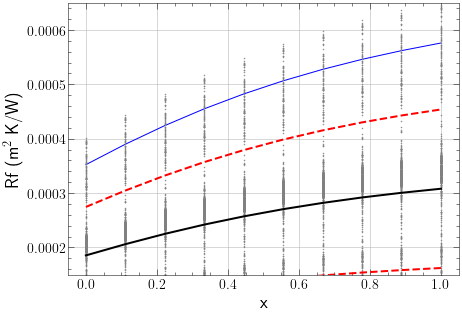

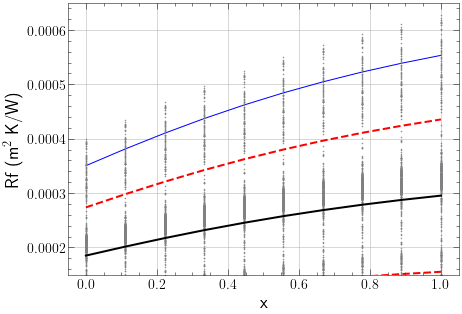

In [5]:
plot_mc2(case="navajo_mc_pumped", zi=0, ti=-1, title="Rf (m$^2$ K/W)", key = "condenser.Rf", ylim=(0.00015, 0.00065))
plot_mc2(case="navajo_mc_pumped", zi=29, ti=-1, title="Rf (m$^2$ K/W)", key = "condenser.Rf", ylim=(0.00015, 0.00065))

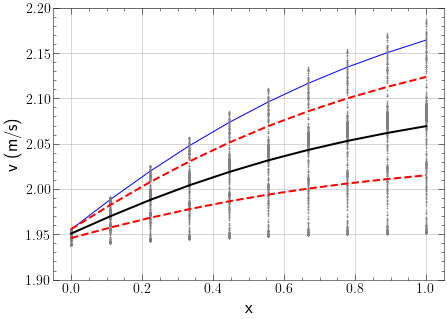

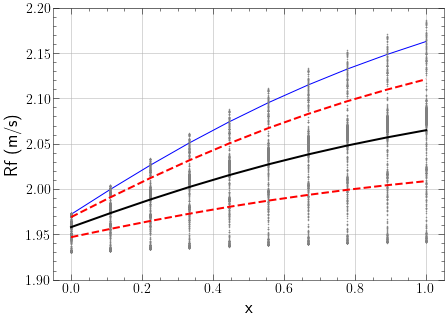

In [6]:
plot_mc2(case="navajo_mc_pumped", zi=0, ti=-1, title="v (m/s)", key = "condenser.v", ylim=(1.9, 2.2))
plot_mc2(case="navajo_mc_pumped", zi=29, ti=-1, title="Rf (m/s)", key = "condenser.v", ylim=(1.9, 2.2))

In [7]:
def plot_mc3(case="colesoncove_mc_pumped", zi=30, ti=-1, xi=-1, title="Rf (m$^2$ K/W)", key = "condenser.Rf", factor=1):
        
    fig, ax = plt.subplots()
    
    Y=[]
    for file in glob.glob("../mc/{}_*.out.json".format(case)):
        try:
            with open(file) as f:
                json_data=f.read()
                data = json.loads(json_data)
        except:
            continue
            
        y=np.array(data[key]["Values"])[ti,xi,zi]*factor
        Y.append(y)
        
    Y = np.array(Y)
    
    ax.hist(Y, color="blue", edgecolor="white")
    t=data[key]["Times"][ti]/24/3600

    #ax.plot(x, np.mean(Y, axis=0), "k-", markersize=0, linewidth = 2)
    #ax.plot(x, np.mean(Y, axis=0)+np.std(Y, axis=0), "r--", markersize=0, linewidth = 2)
    #ax.plot(x, np.mean(Y, axis=0)-np.std(Y, axis=0), "r--", markersize=0, linewidth = 2)

    ax.set_ylabel("Frequency")
    ax.set_xlabel(title)
    ax.set_title("Day {} / z={}".format(int(t), zi+1))
    ax.grid()
    
    plt.savefig('../mc/plot_mc3_{}_{}.pdf'.format(case, key), dpi=600)
    plt.show()

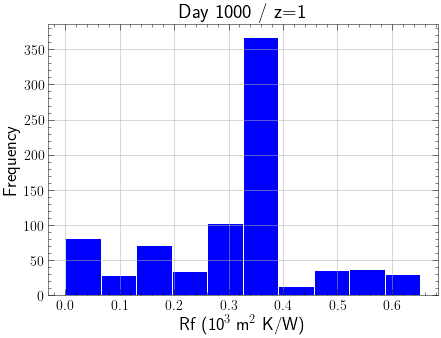

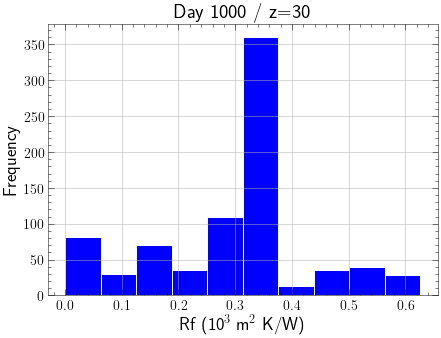

In [8]:
plot_mc3(case="navajo_mc_pumped", zi=0, ti=-1, title="Rf (10$^3$ m$^2$ K/W)", key = "condenser.Rf", factor=1e3)
plot_mc3(case="navajo_mc_pumped", zi=29, ti=-1, title="Rf (10$^3$ m$^2$ K/W)", key = "condenser.Rf", factor=1e3)

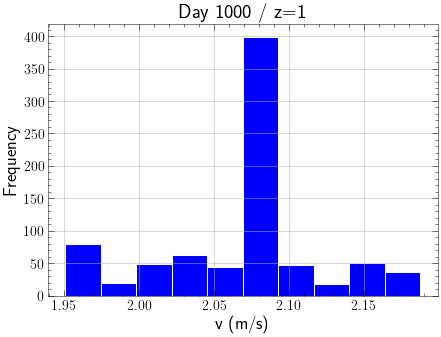

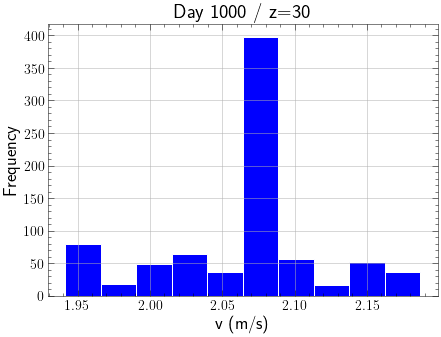

In [9]:
plot_mc3(case="navajo_mc_pumped", zi=0, ti=-1, title="v (m/s)", key = "condenser.v")
plot_mc3(case="navajo_mc_pumped", zi=29, ti=-1, title="v (m/s)", key = "condenser.v")